In [74]:
! pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

Defaulting to user installation because normal site-packages is not writeable


In [75]:
df = pd.read_excel("/home/aditya/Desktop/Dsci_Project/E Commerce Dataset.xlsx", sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Data Cleaning


In [76]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [77]:
df.select_dtypes(include='object').nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [78]:
df.drop(columns='CustomerID', inplace=True)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


#  Data Segmentation and Analysis

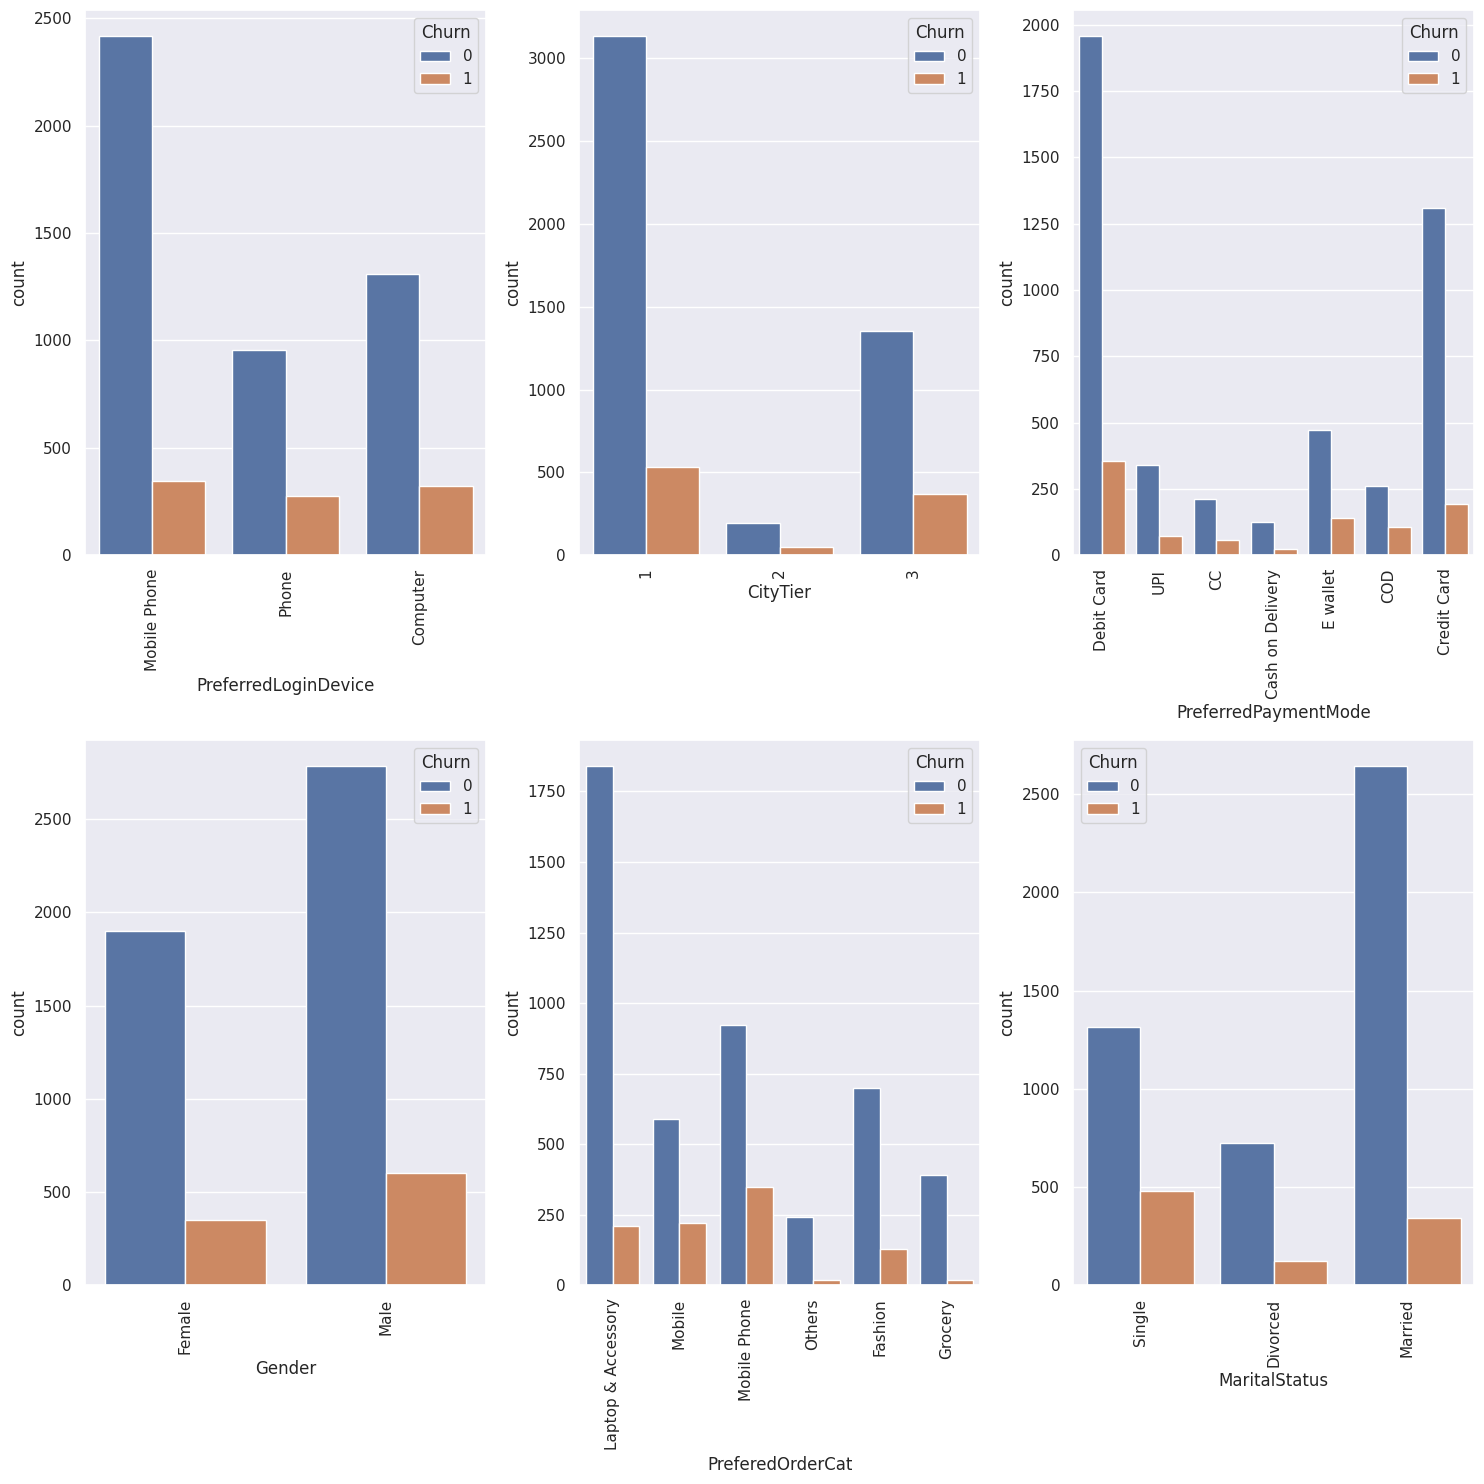

In [79]:
cat_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 
            'PreferedOrderCat','MaritalStatus']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()

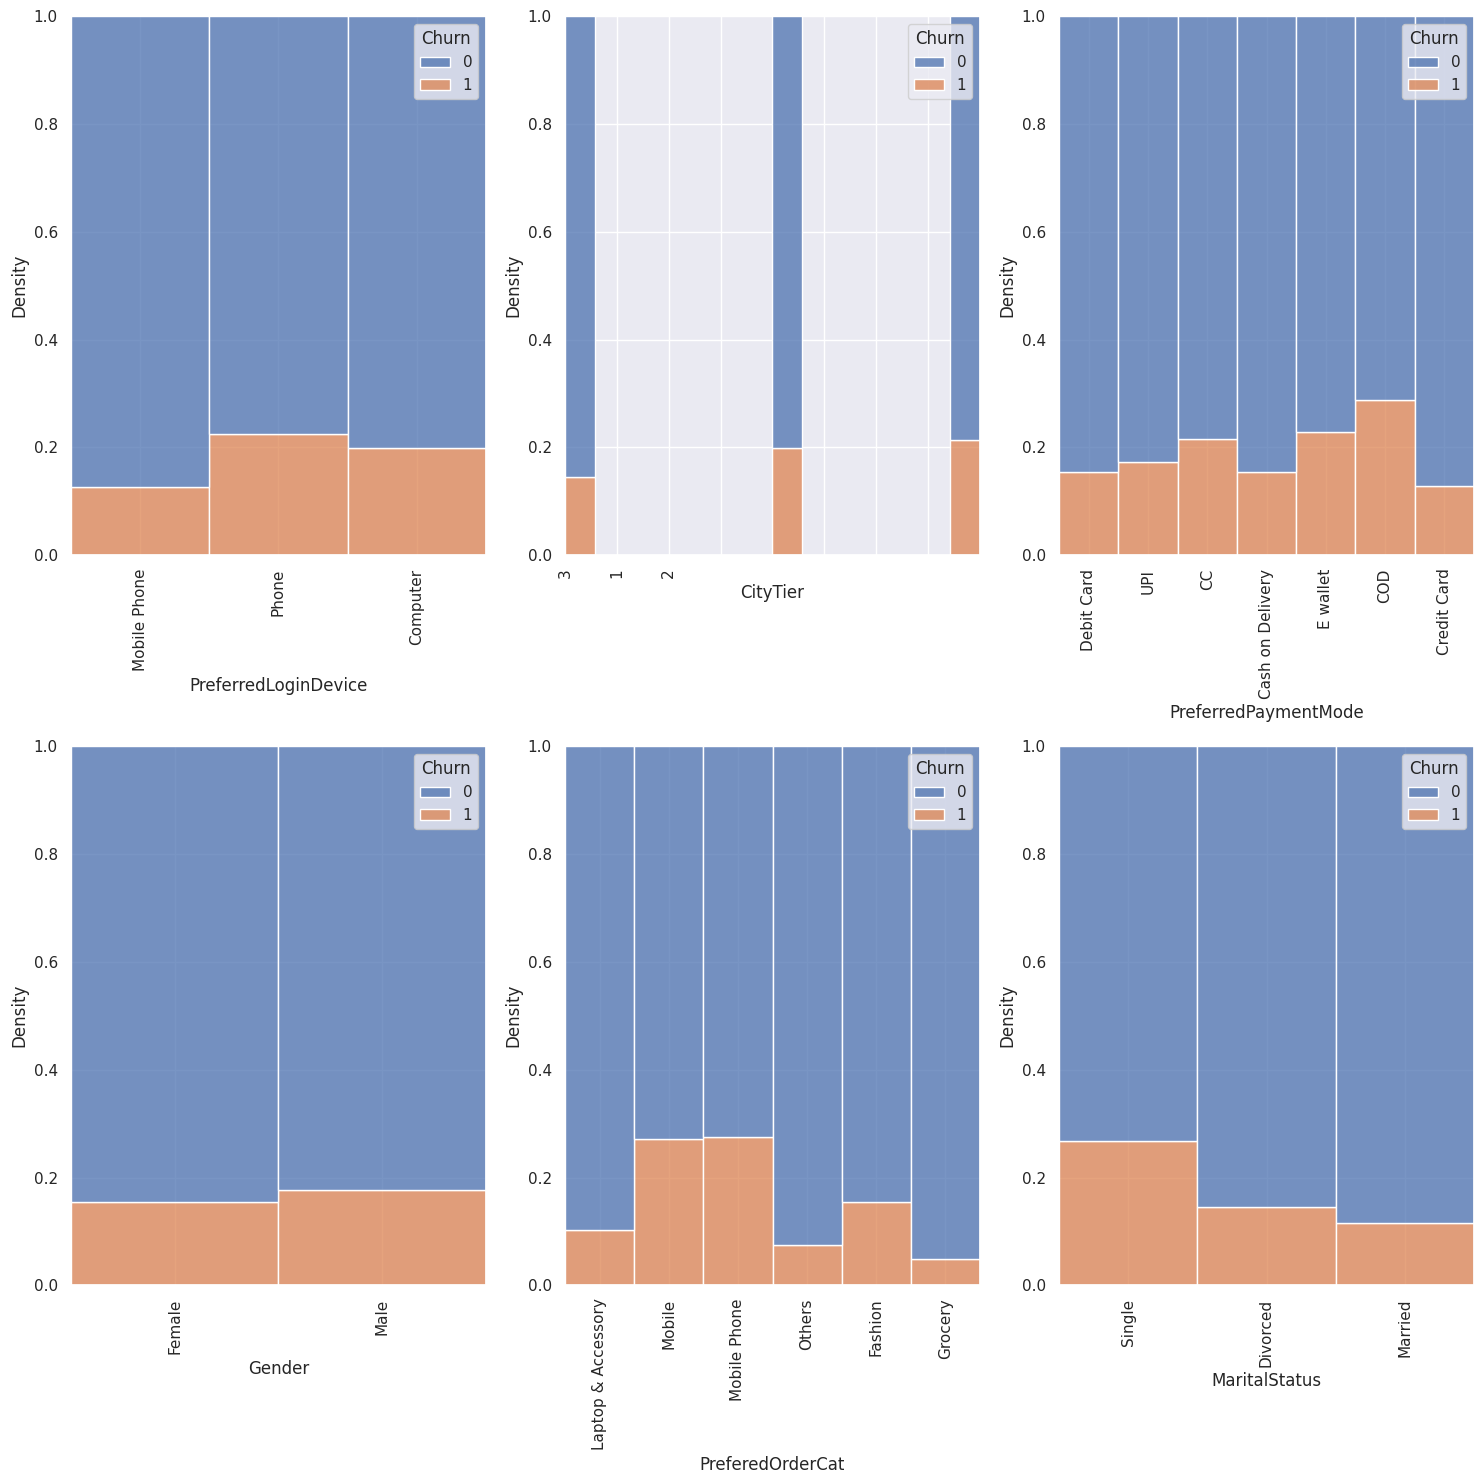

In [80]:
import warnings
warnings.filterwarnings("ignore")
cat_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 
            'PreferedOrderCat','MaritalStatus']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Churn', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

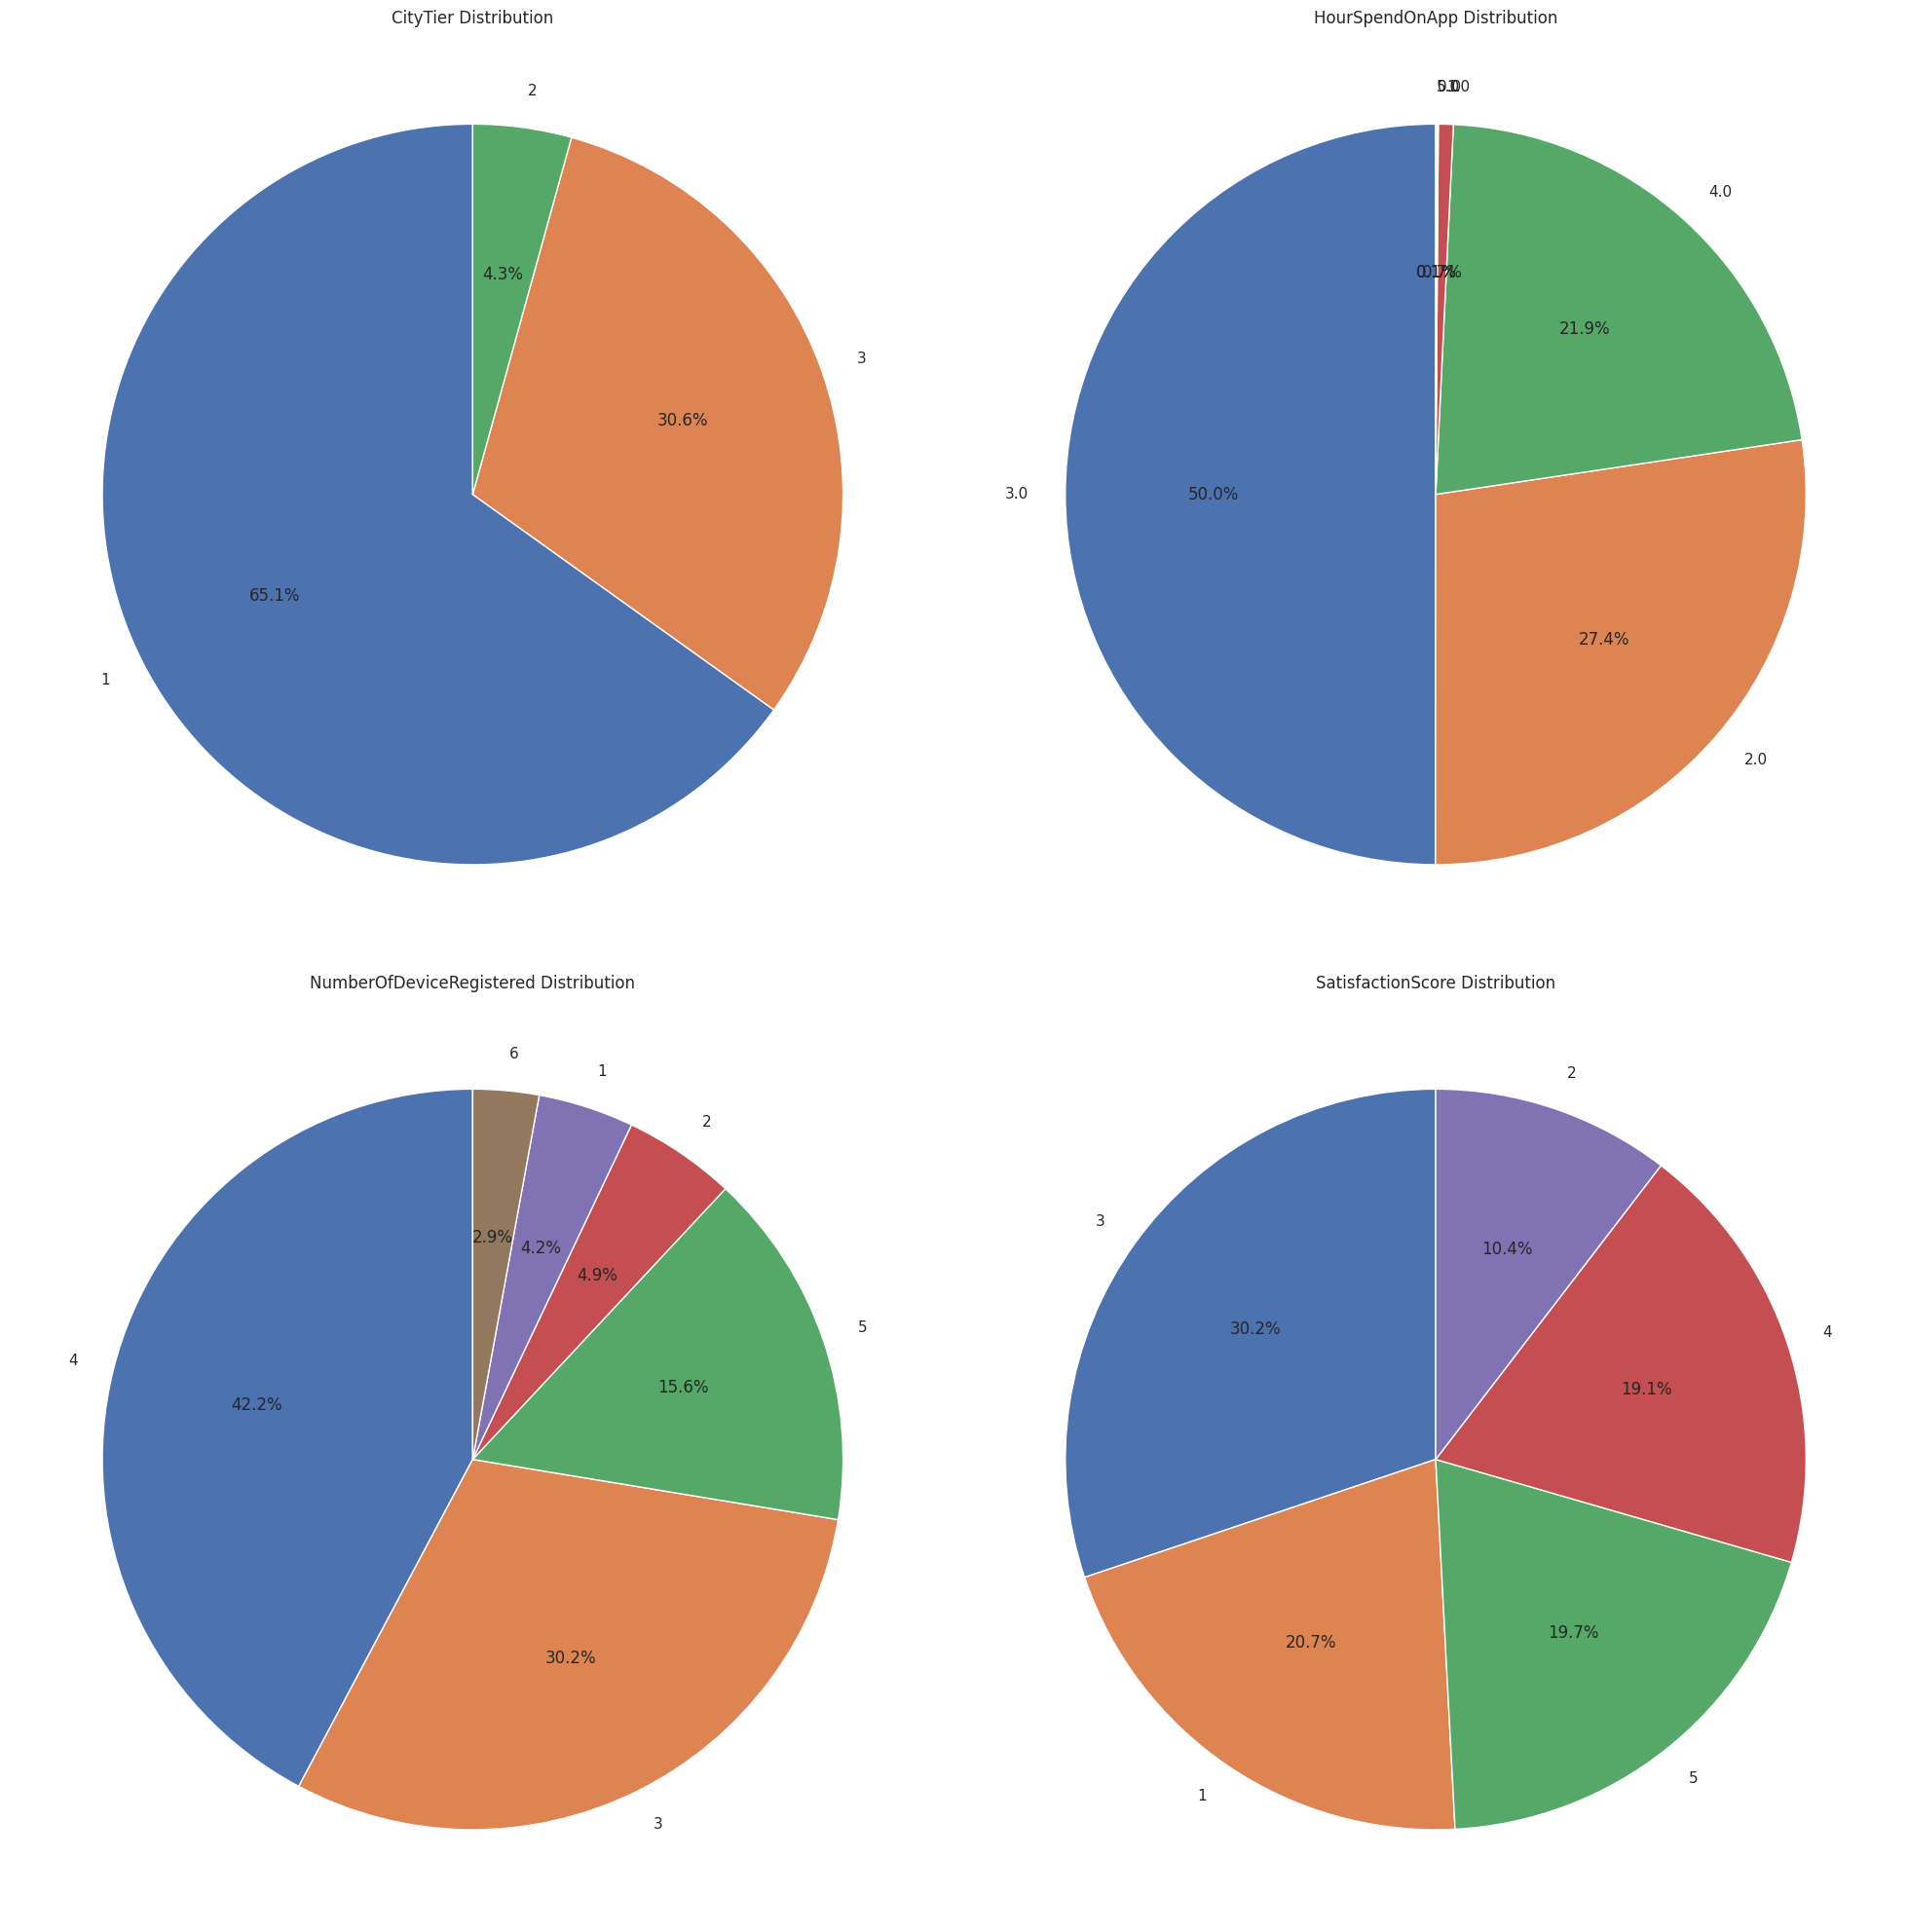

In [81]:
cat_vars = ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = df[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()

plt.show()

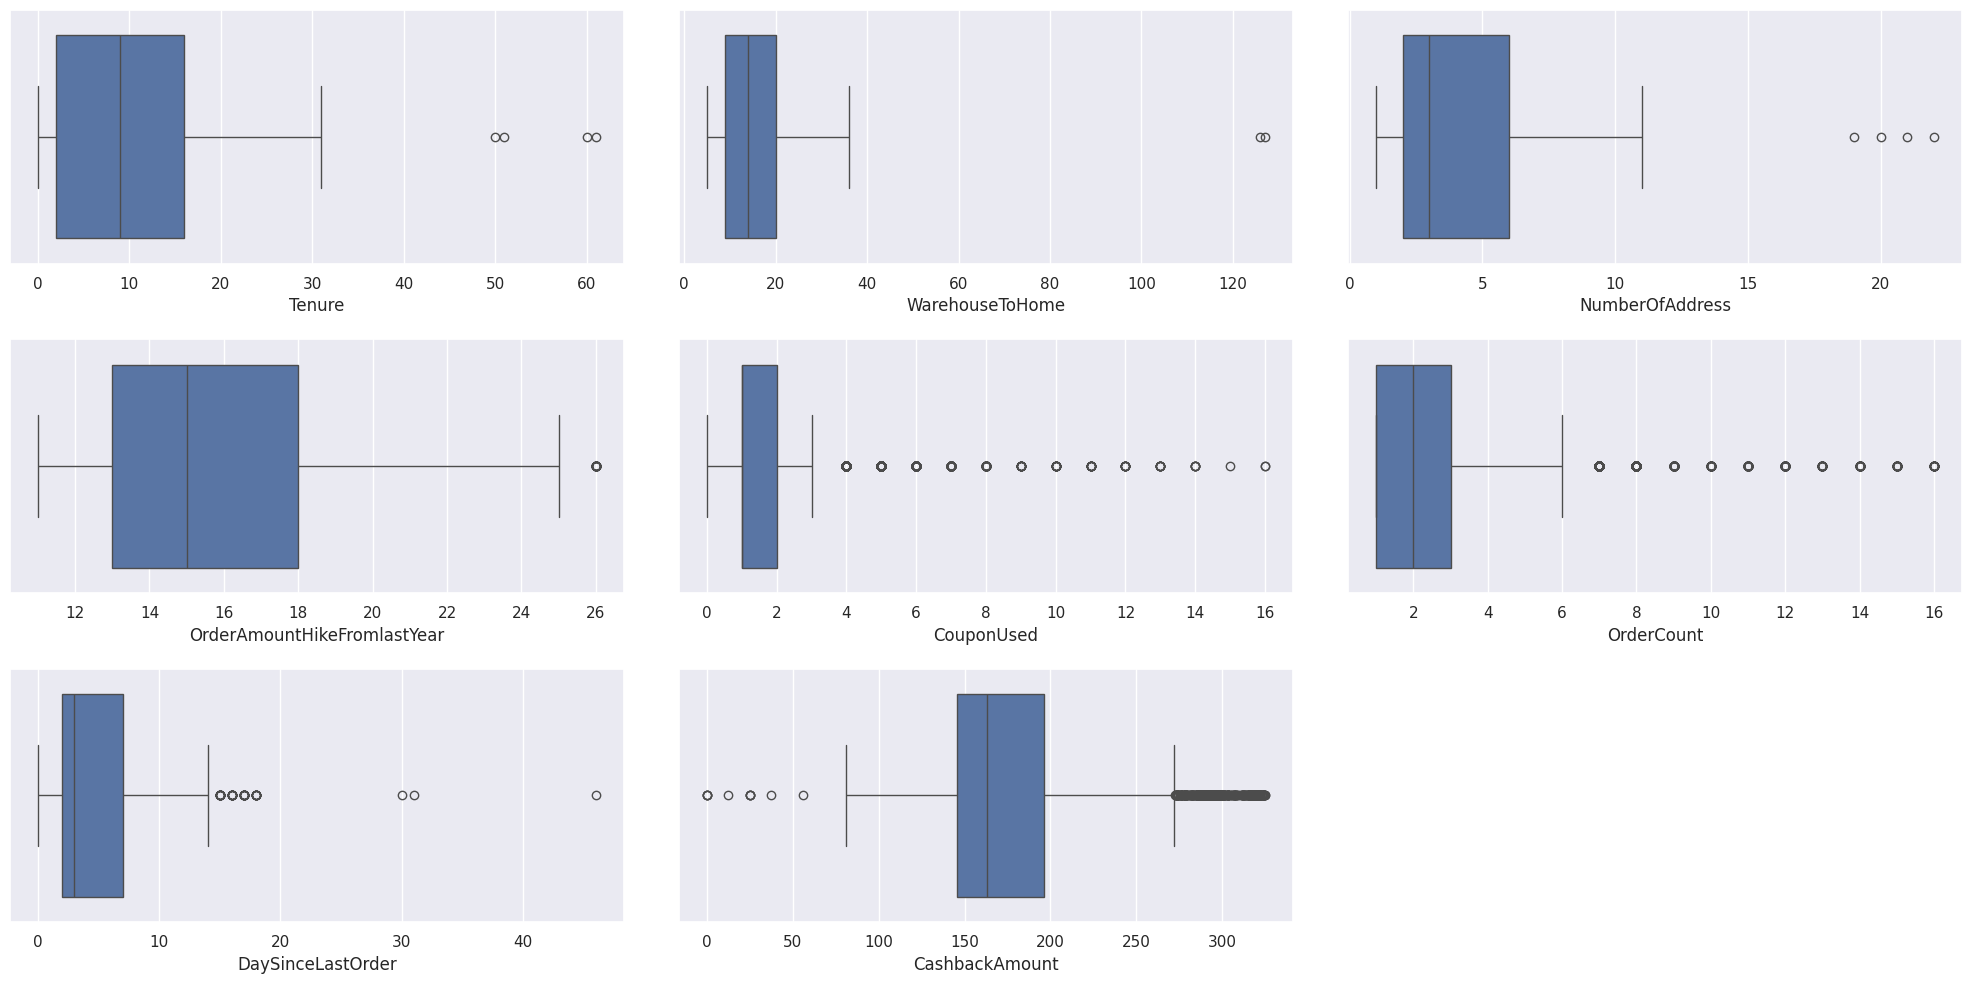

In [82]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

fig.delaxes(axs[8])

plt.show()

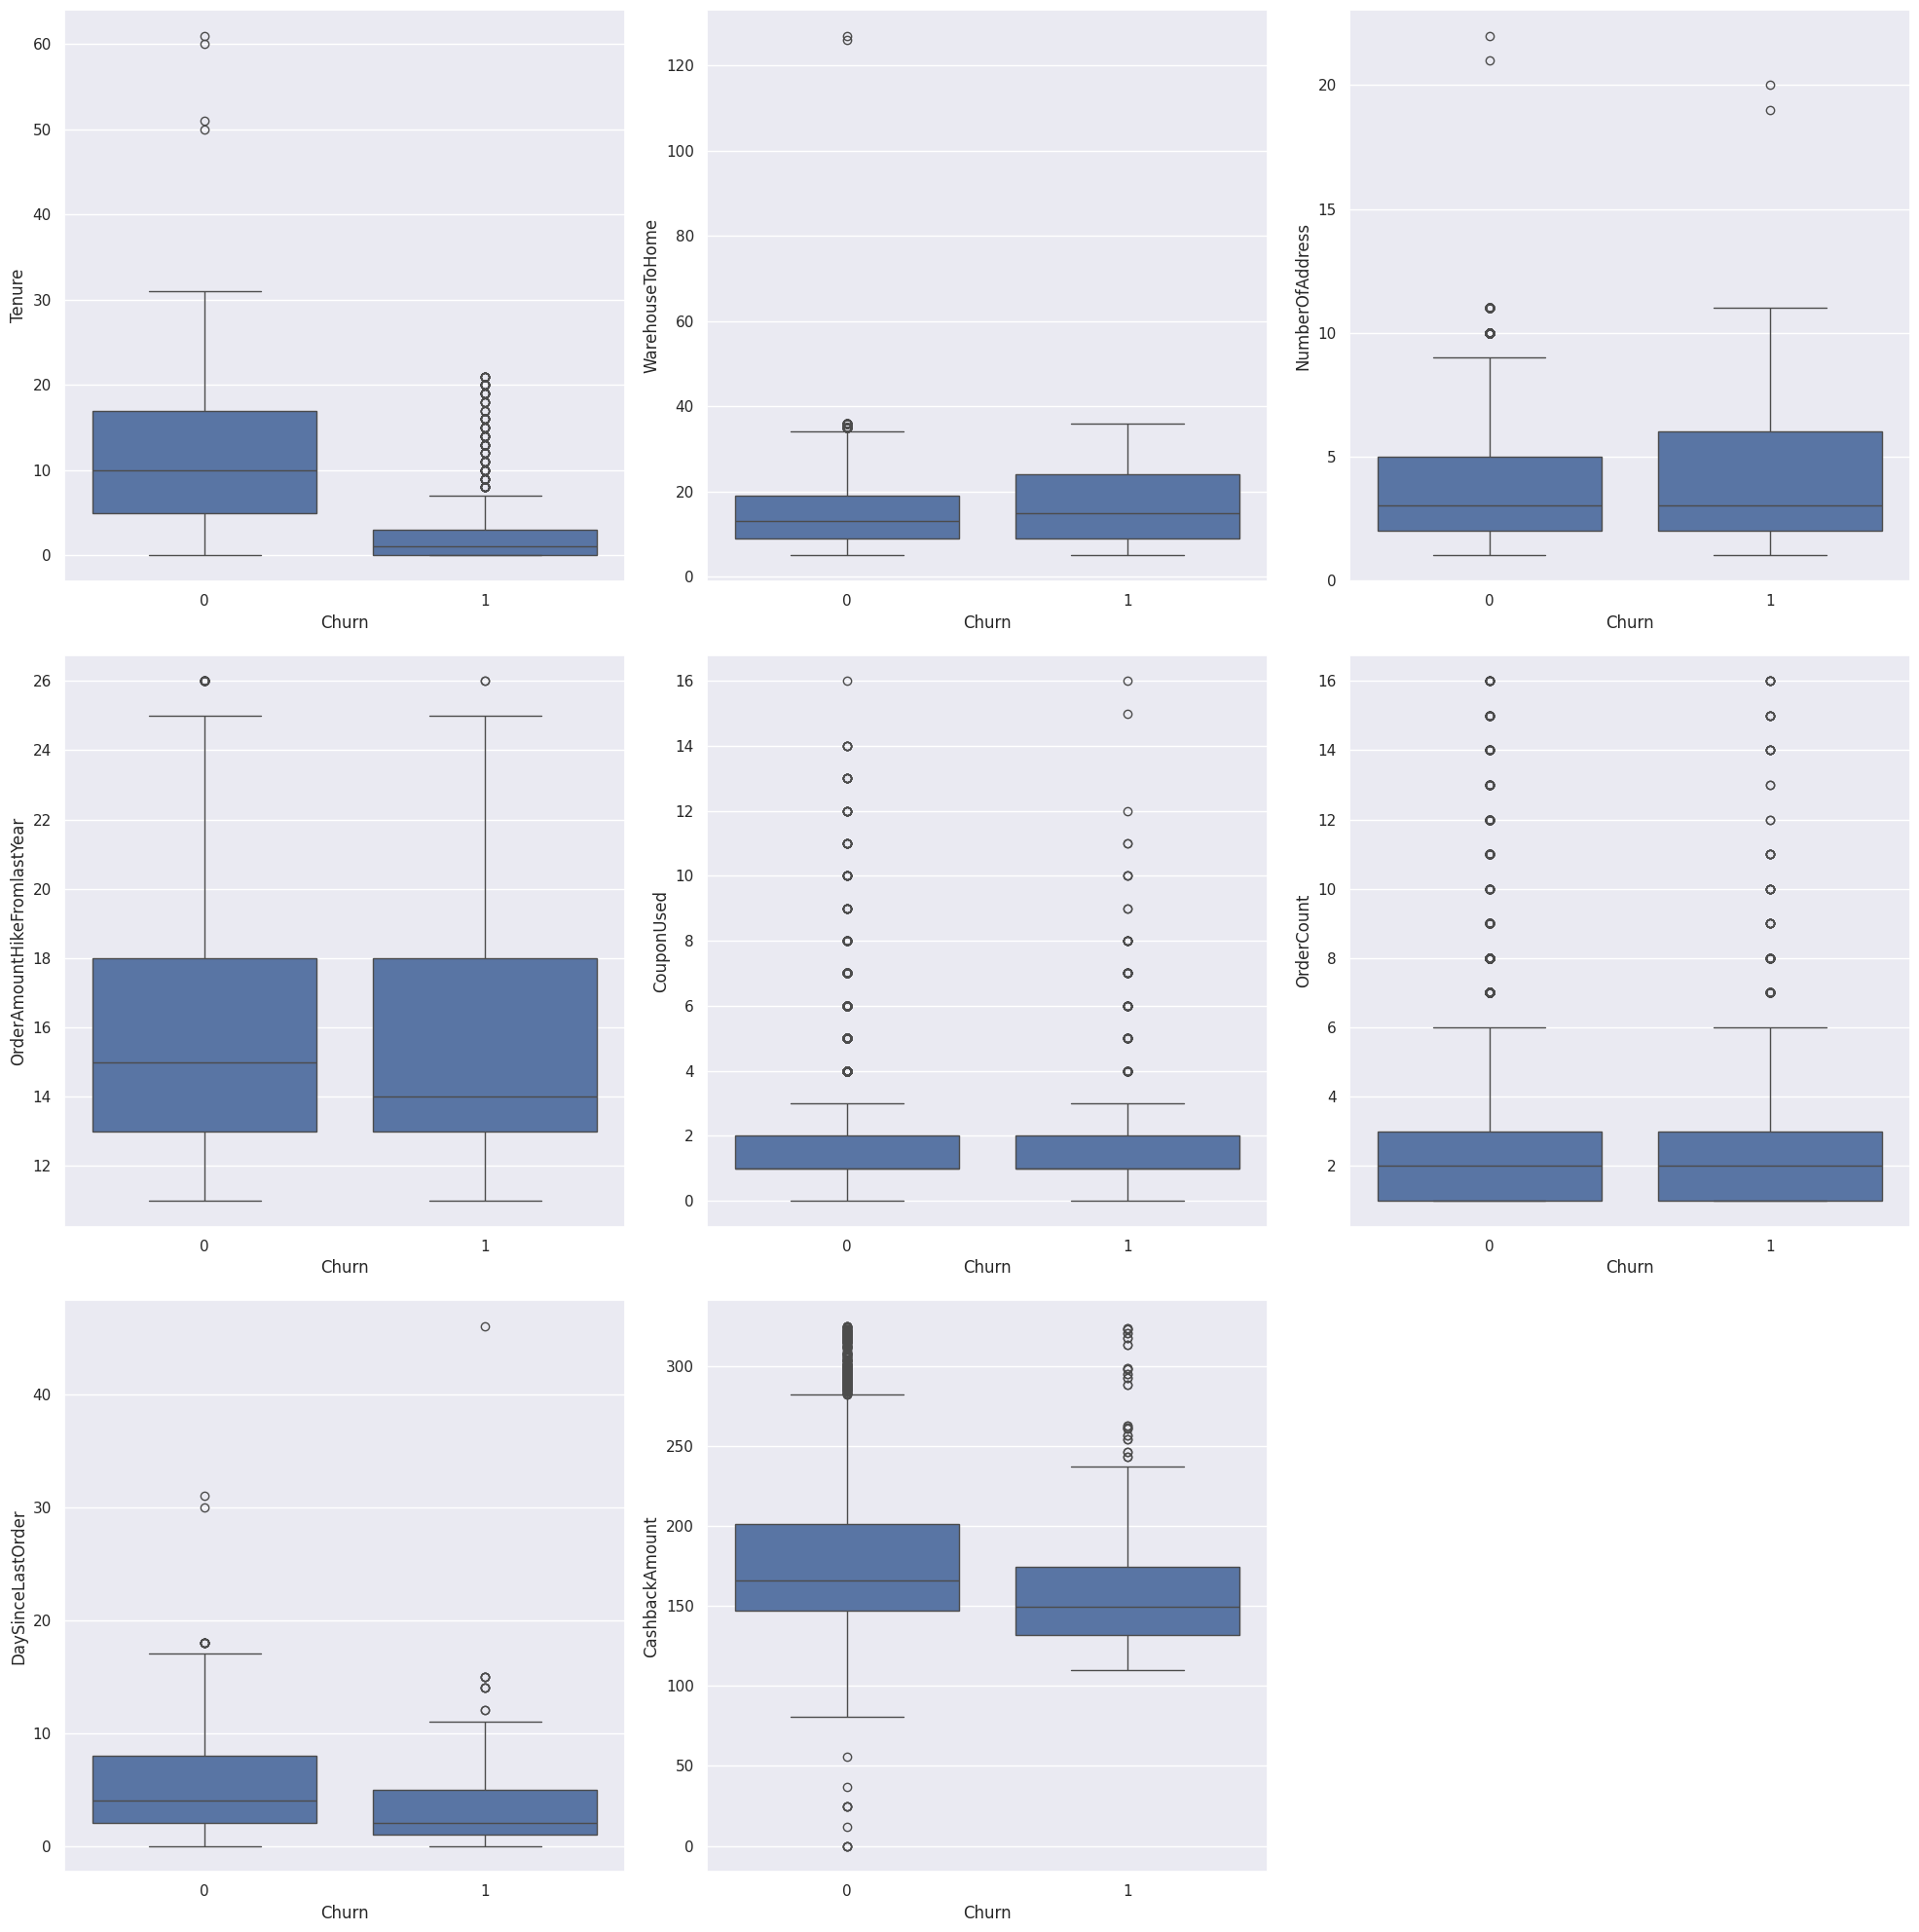

In [83]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Churn', data=df, ax=axs[i])

fig.tight_layout()

fig.delaxes(axs[8])

plt.show()

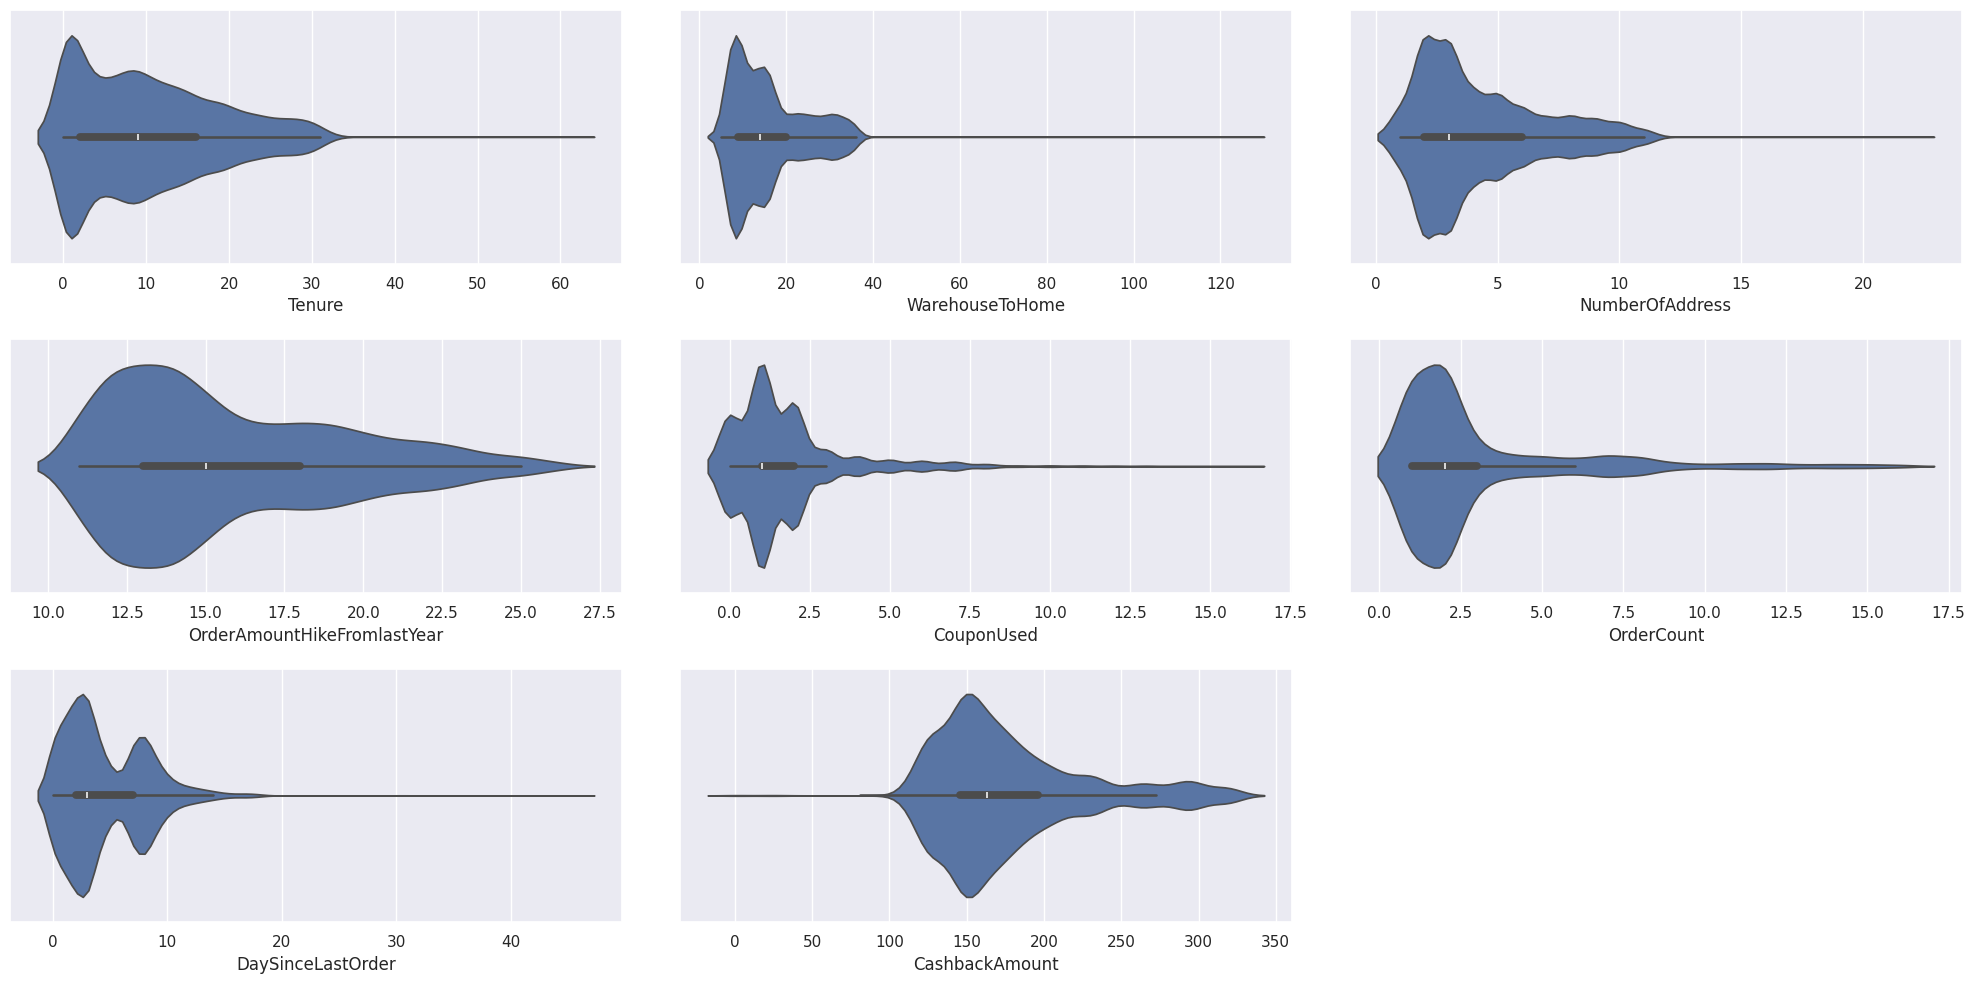

In [84]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

fig.delaxes(axs[8])

plt.show()

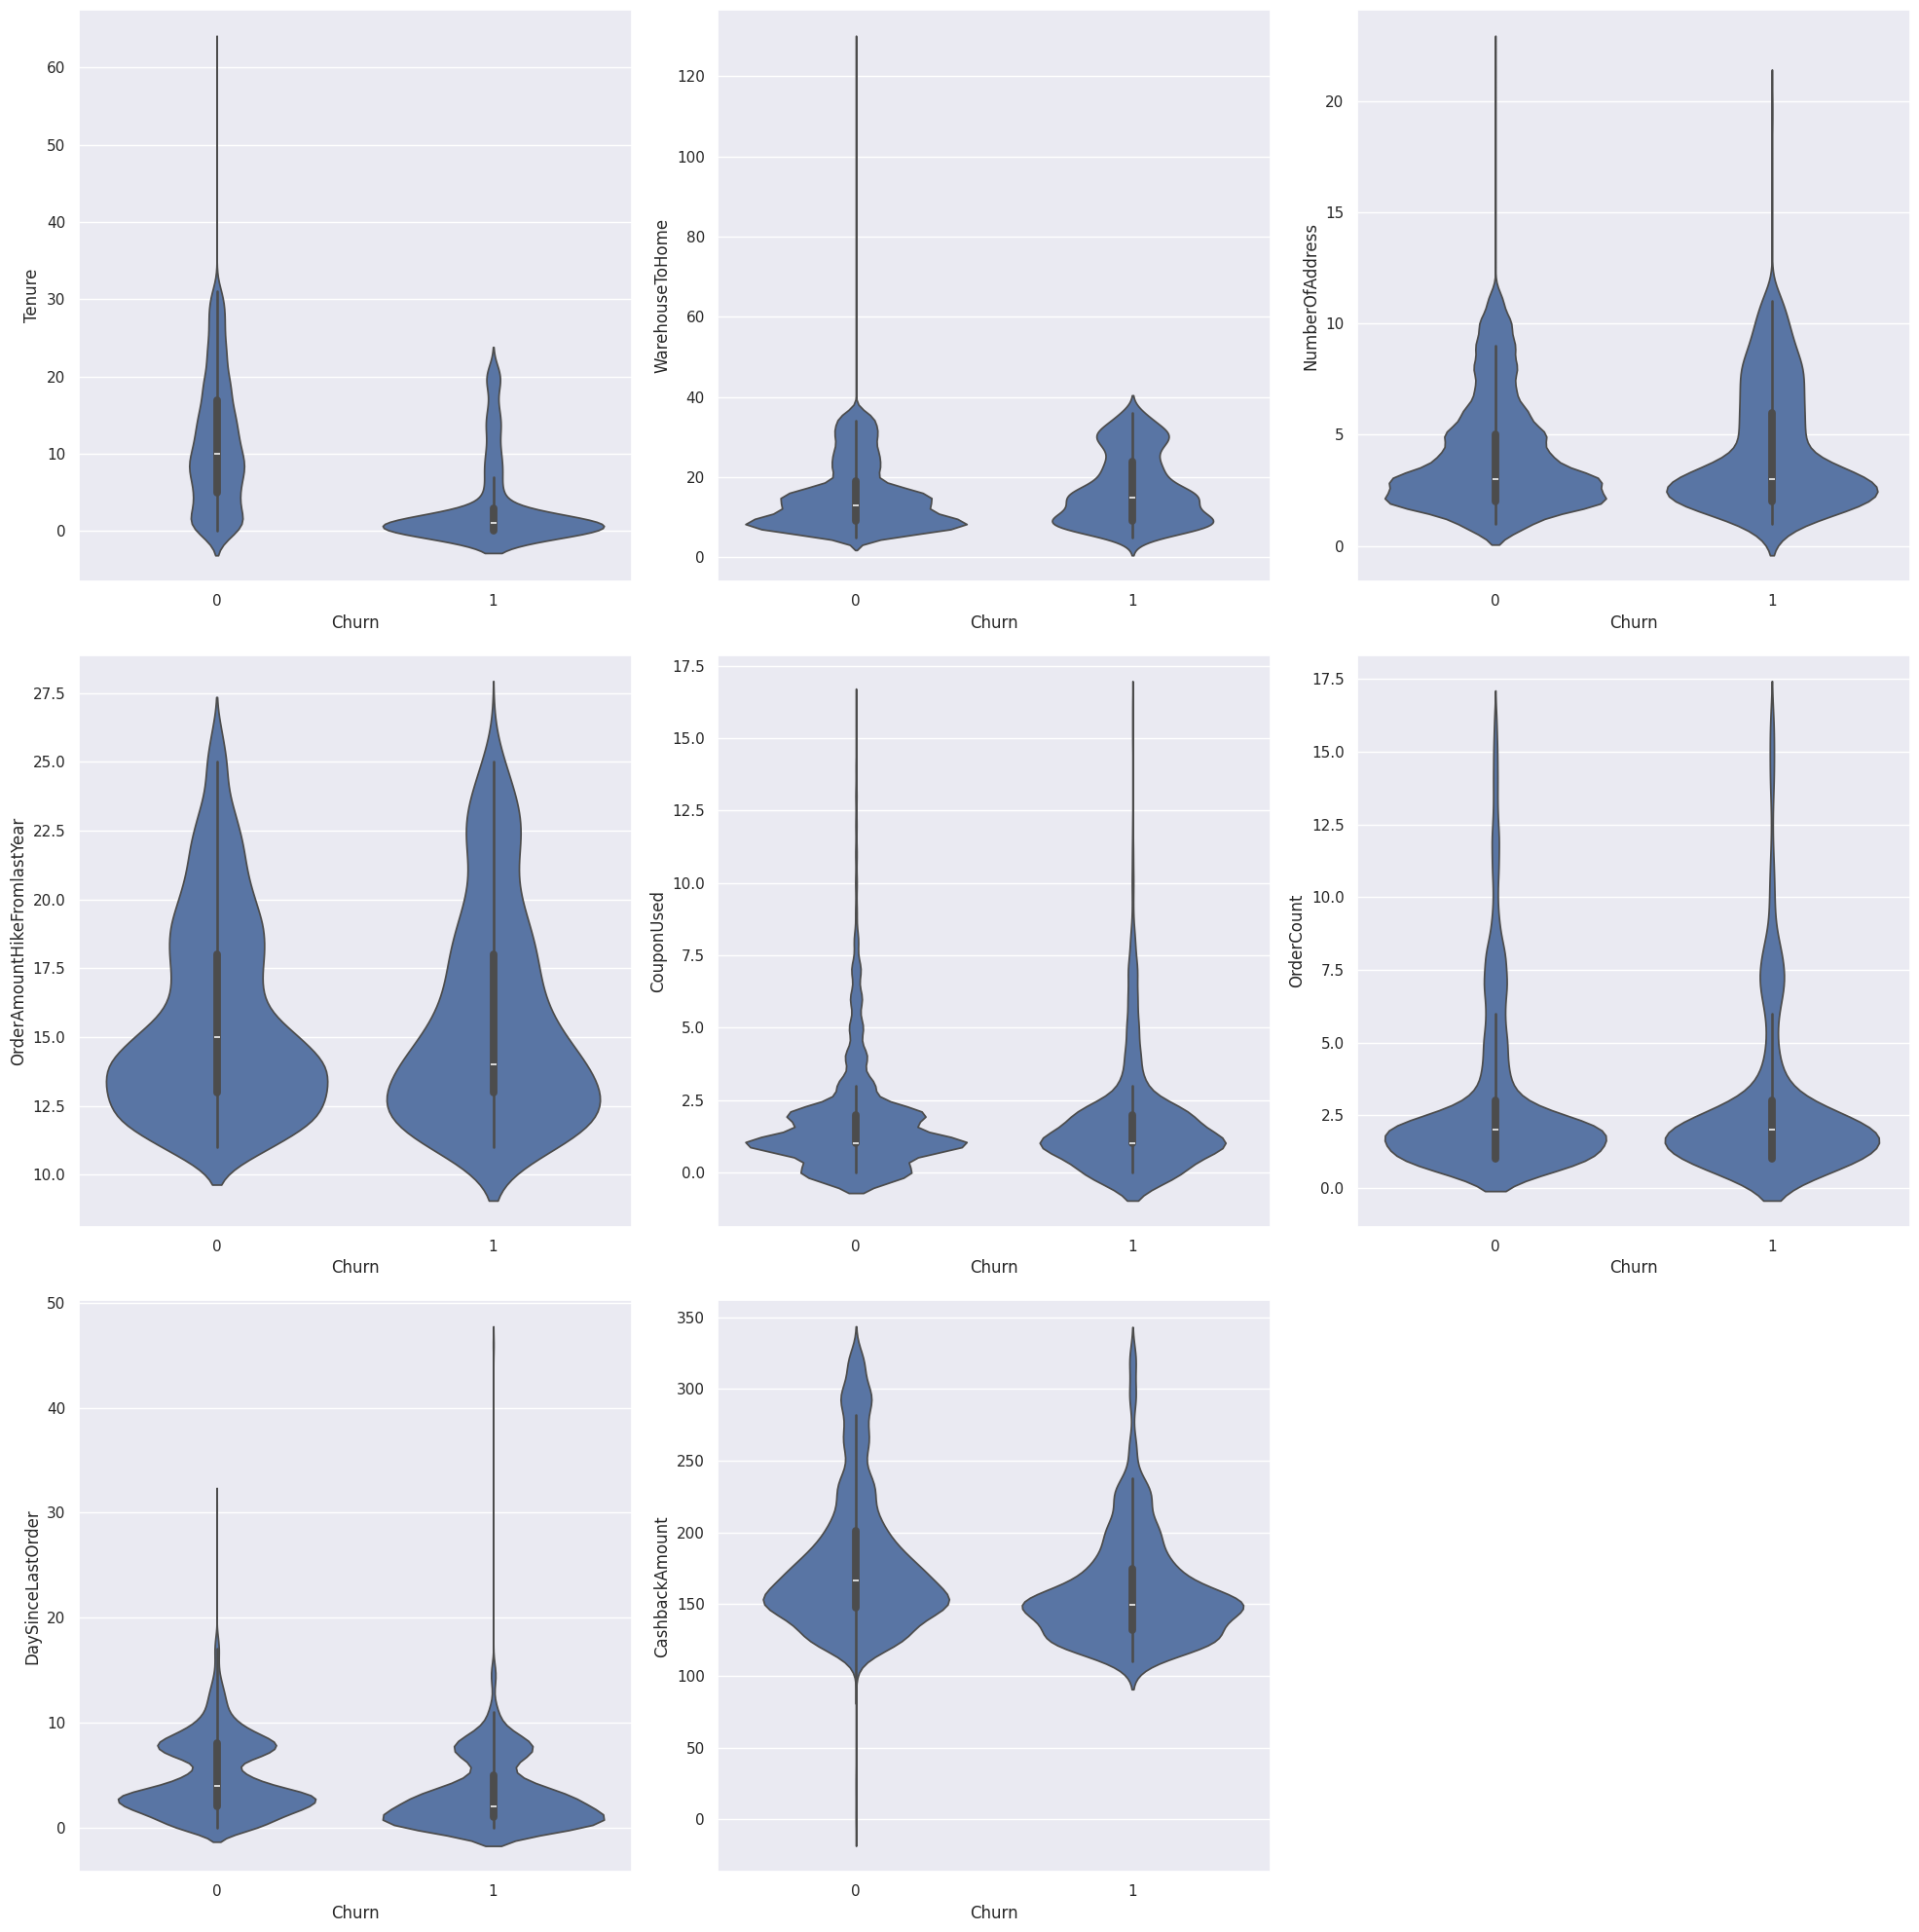

In [85]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Churn', ax=axs[i])

fig.tight_layout()

fig.delaxes(axs[8])

plt.show()

<Axes: xlabel='WarehouseToHome', ylabel='CashbackAmount'>

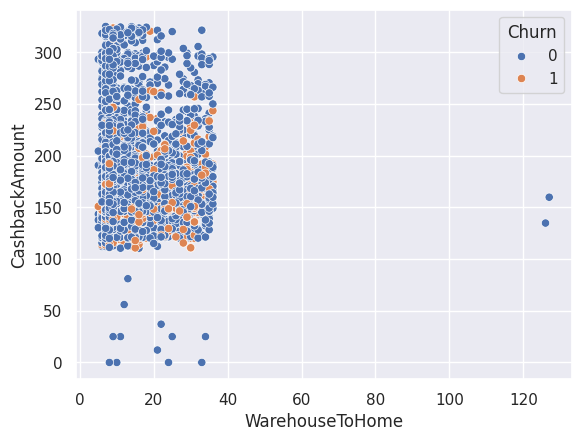

In [86]:
sns.scatterplot(x='WarehouseToHome', y='CashbackAmount', hue='Churn', data=df)

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='CashbackAmount'>

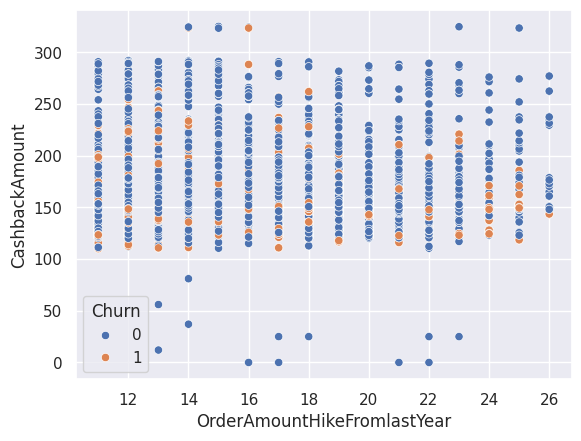

In [87]:
sns.scatterplot(x='OrderAmountHikeFromlastYear', y='CashbackAmount', hue='Churn', data=df)

<Axes: xlabel='DaySinceLastOrder', ylabel='CashbackAmount'>

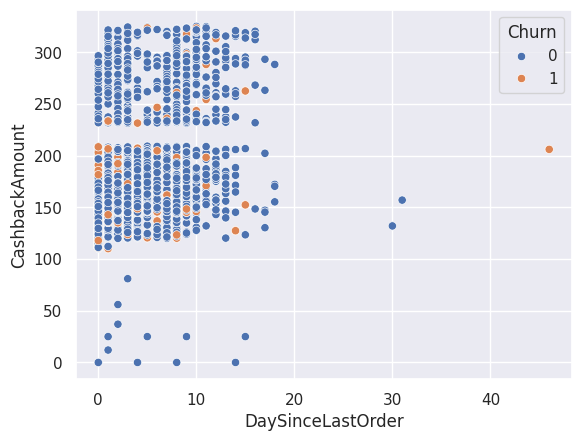

In [88]:
sns.scatterplot(x='DaySinceLastOrder', y='CashbackAmount', hue='Churn', data=df)

<Axes: xlabel='NumberOfAddress', ylabel='CashbackAmount'>

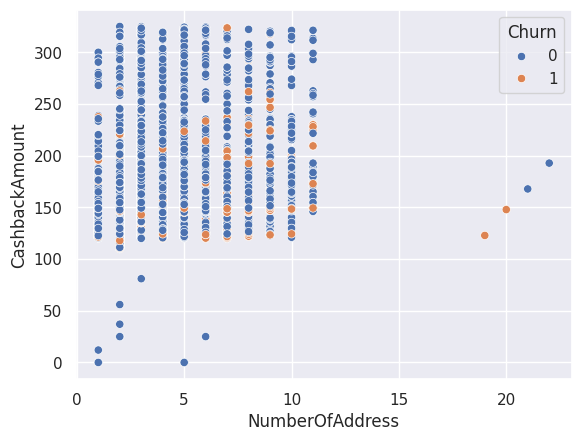

In [89]:
sns.scatterplot(x='NumberOfAddress', y='CashbackAmount', hue='Churn', data=df)

# Data Preprocessing and Algorithm implementation


In [90]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
dtype: float64

In [91]:
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)

In [92]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for Object datatype

In [93]:
for col in df.select_dtypes(include=['object']).columns:
    
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


In [94]:
from sklearn import preprocessing

for col in df.select_dtypes(include=['object']).columns:
    
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: [1 2 0]
PreferredPaymentMode: [4 6 0 2 5 1 3]
Gender: [0 1]
PreferedOrderCat: [2 3 4 5 0 1]
MaritalStatus: [2 0 1]


# Correlation Heatmap

<Axes: >

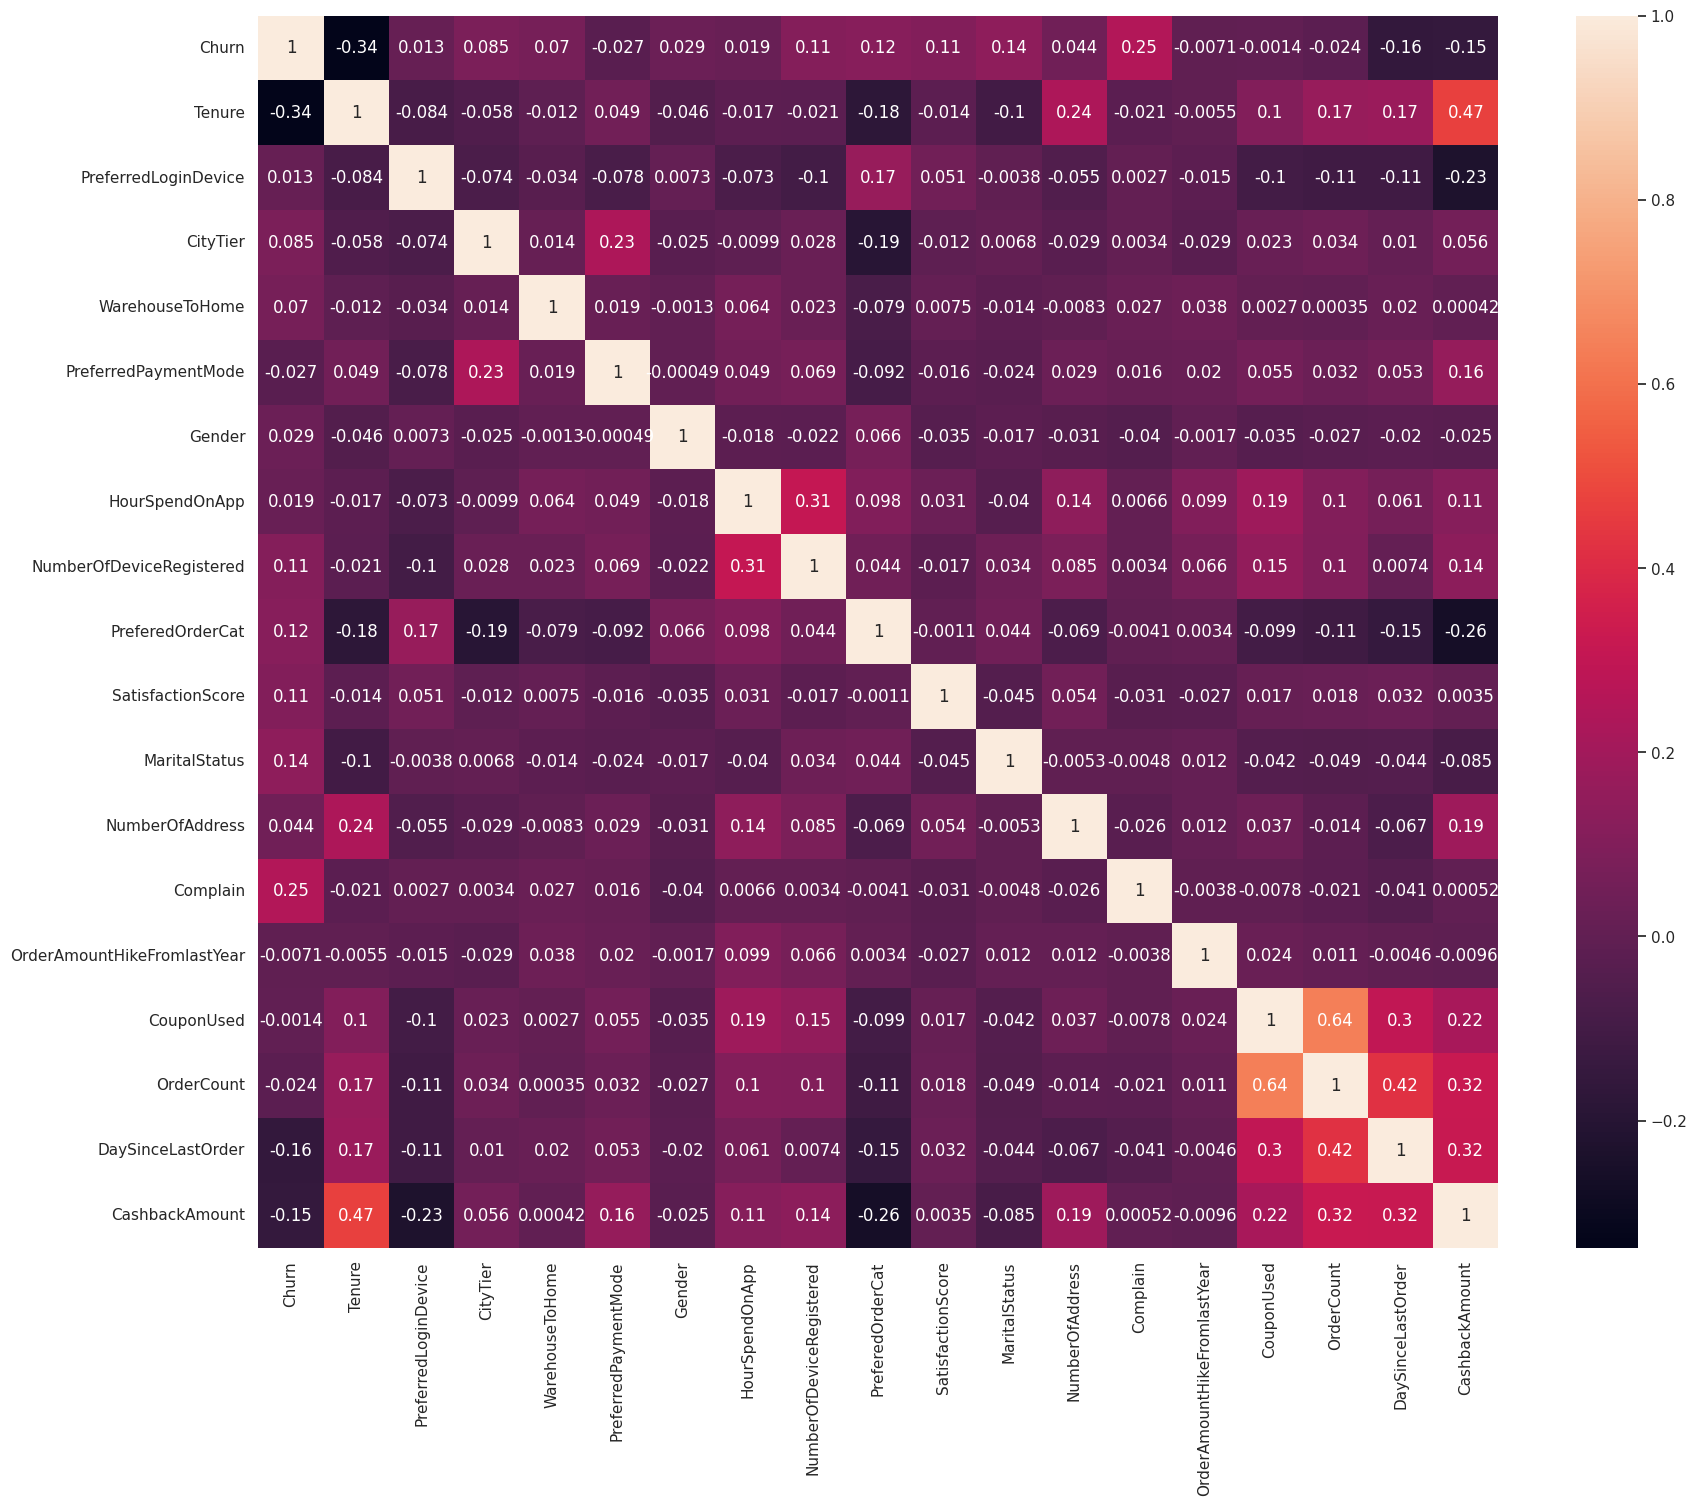

In [95]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [96]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove Outlier in Train Data using Z-Score

In [97]:
from sklearn.model_selection import train_test_split

selected_column = ['WarehouseToHome', 'DaySinceLastOrder', 'CouponUsed', 'OrderCount']
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_z_scores = np.abs((train_df[selected_column] - train_df[selected_column].mean()) / train_df[selected_column].std())
threshold = 3
train_df_no_outliers = train_df[train_z_scores <= threshold]

# Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree_gini = DecisionTreeClassifier(criterion='gini', class_weight='balanced')
param_grid_gini = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Grid search with Gini index
grid_search_gini = GridSearchCV(dtree_gini, param_grid_gini, cv=5)
grid_search_gini.fit(X_train, y_train)

print("Best parameters using Gini index:")
print(grid_search_gini.best_params_)

# Decision tree with entropy
dtree_entropy = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
param_grid_entropy = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Grid search with entropy
grid_search_entropy = GridSearchCV(dtree_entropy, param_grid_entropy, cv=5)
grid_search_entropy.fit(X_train, y_train)

print("\nBest parameters using Entropy:")
print(grid_search_entropy.best_params_)

# Printing accuracy for both Gini index and entropy
print("\nAccuracy using Gini index:", grid_search_gini.best_score_)
print("Accuracy using Entropy:", grid_search_entropy.best_score_)


Best parameters using Gini index:
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}

Best parameters using Entropy:
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}

Accuracy using Gini index: 0.8574608459736094
Accuracy using Entropy: 0.860347761746208


In [99]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [100]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 88.01 %


In [101]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8801065719360568
Precision Score :  0.8801065719360568
Recall Score :  0.8801065719360568
Jaccard Score :  0.7858842188739096
Log Loss :  4.321397164769818


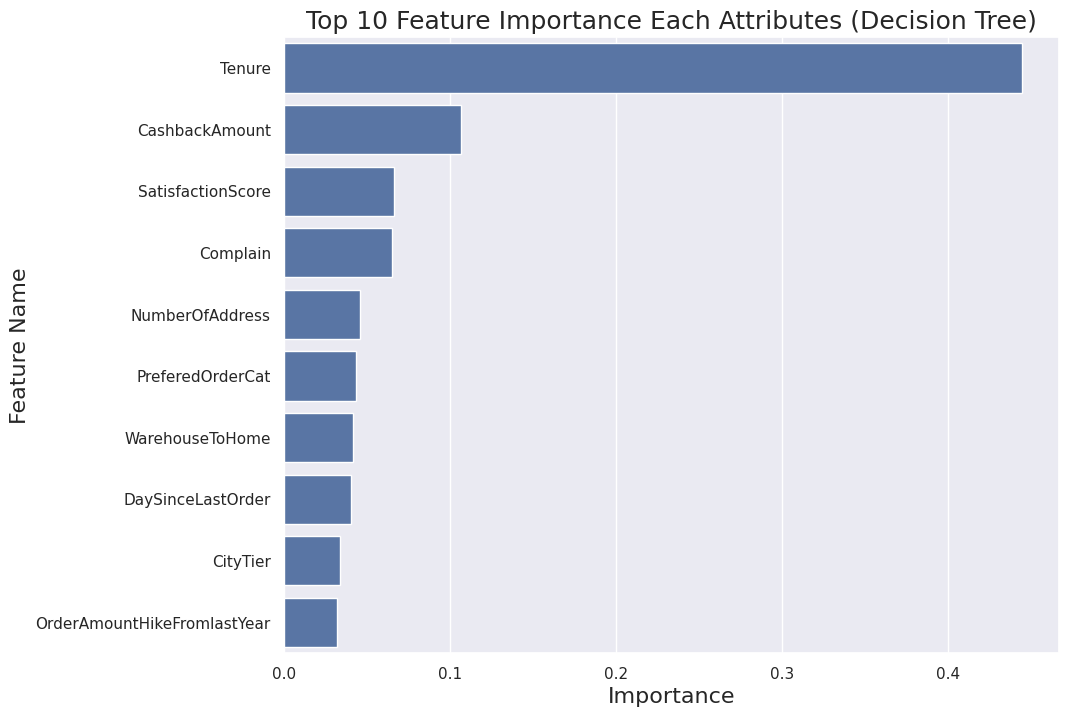

In [102]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

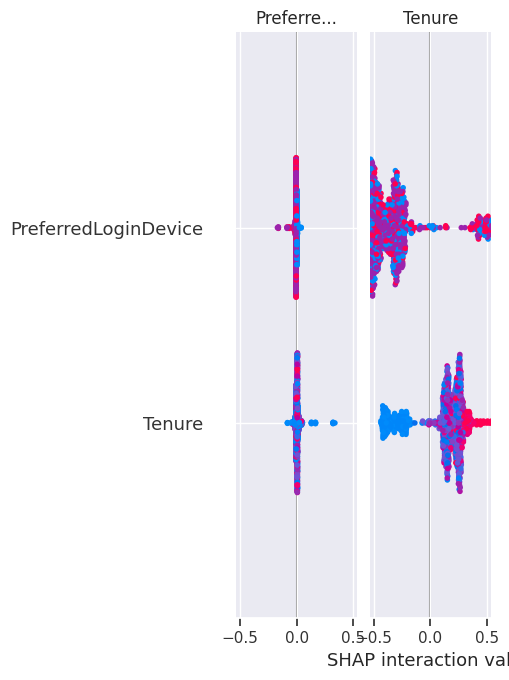

In [103]:
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree.fit(X_train, y_train)
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


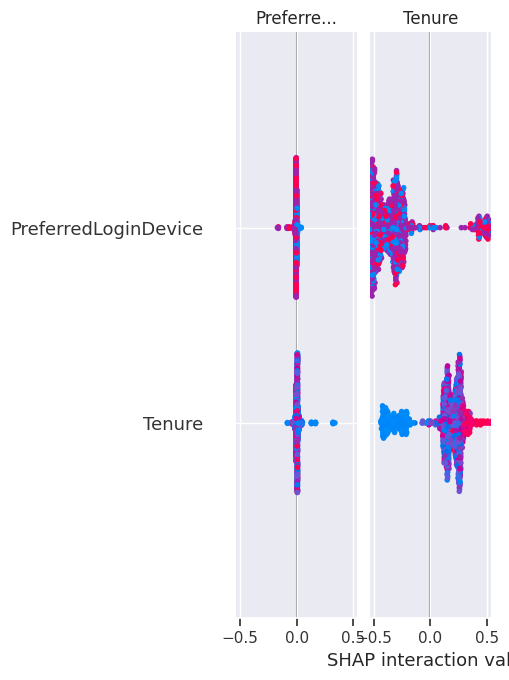

In [104]:
import shap

explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="violin")


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8801065719360568')

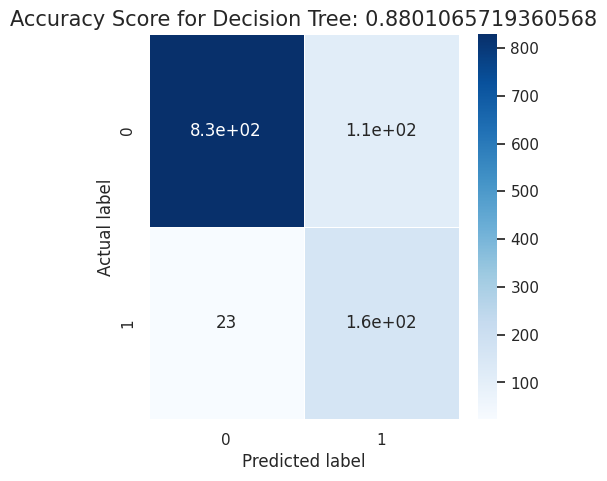

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

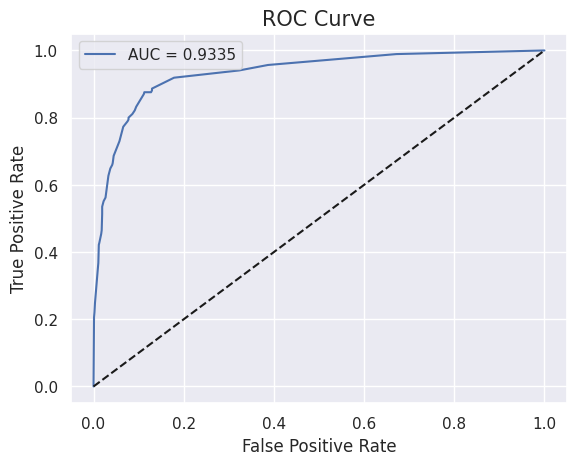

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [107]:
! pip install scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


Defaulting to user installation because normal site-packages is not writeable
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [109]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.6 %


In [110]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9760213143872114
Precision Score :  0.9760213143872114
Recall Score :  0.9760213143872114
Jaccard Score :  0.9531656548135299
Log Loss :  0.8642794329539639


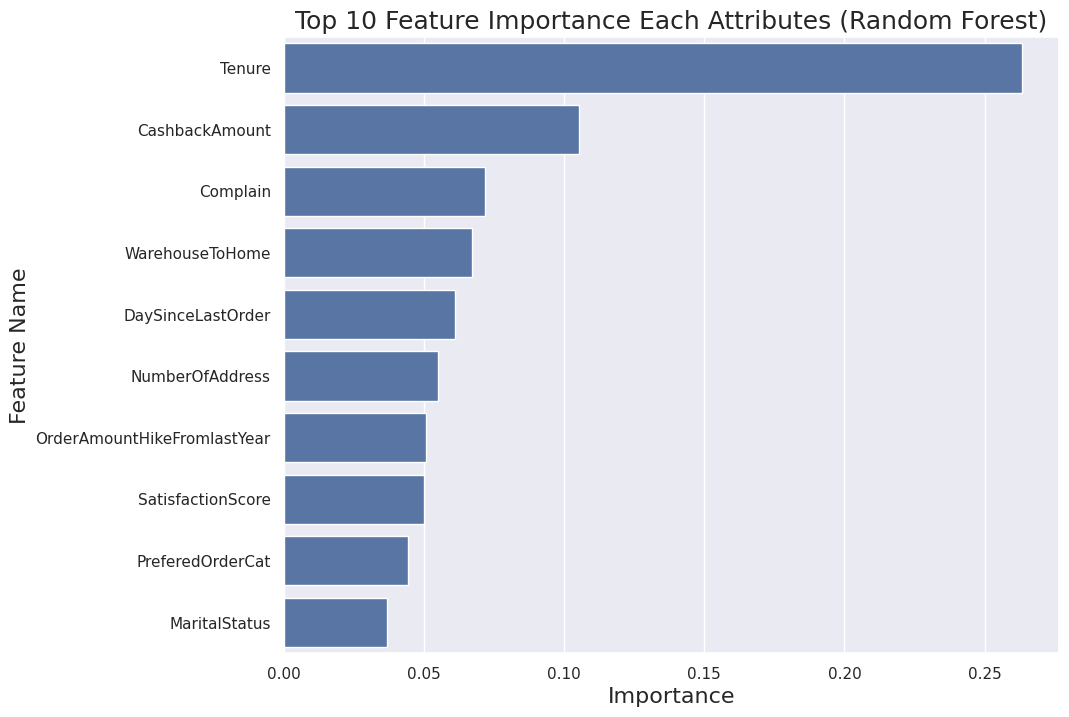

In [111]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

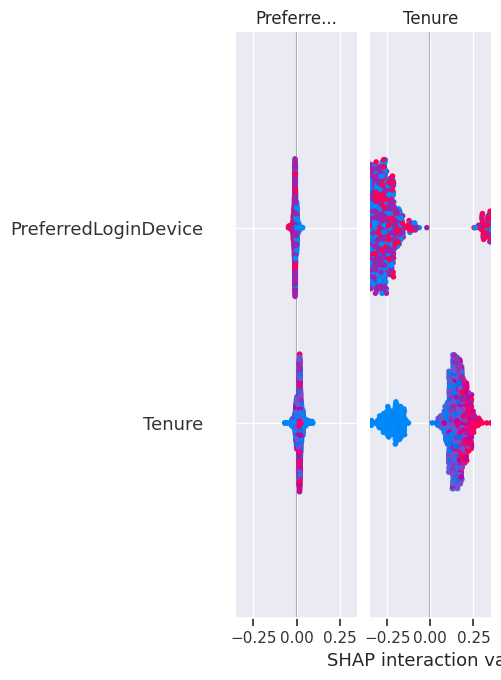

In [112]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

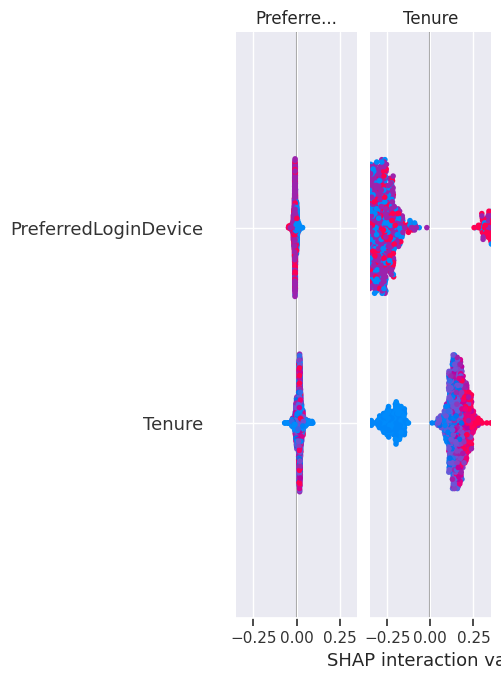

In [113]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9760213143872114')

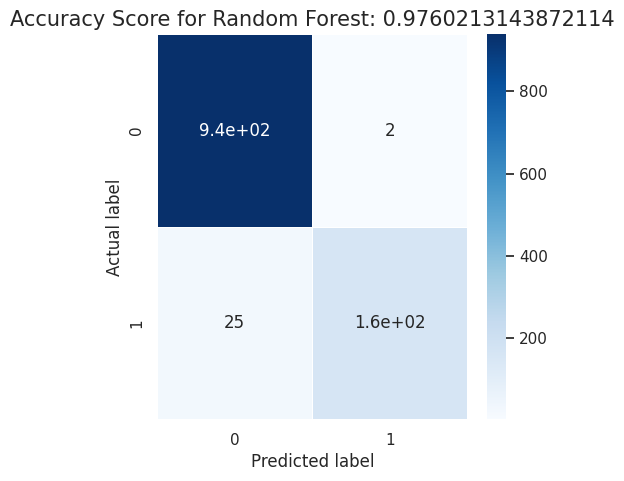

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

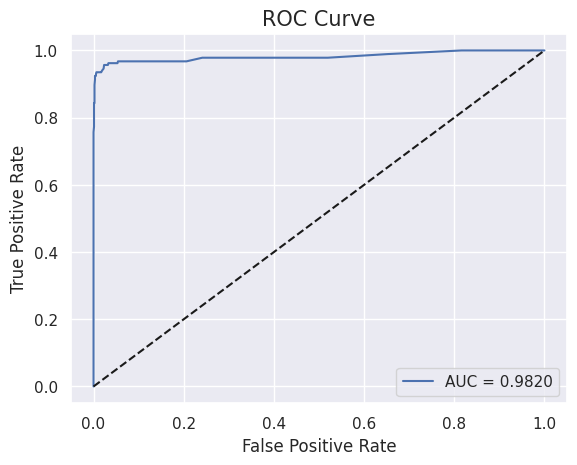

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

KMeans Clustering Algortithm

In [116]:

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

kmeans = KMeans()

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],  
    'init': ['k-means++', 'random'],  
    'max_iter': [300, 500, 1000],  
    'random_state': [0, 42]  
}

grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X_train) 

print(grid_search.best_params_)


{'init': 'random', 'max_iter': 300, 'n_clusters': 6, 'random_state': 42}


In [117]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                random_state=42)
kmeans.fit(X_train)  # Assuming X_train is your training data



KMeans(n_init=10, random_state=42)

In [118]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train, kmeans.labels_)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.2921980114383971


In [119]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9760213143872114
Precision Score :  0.9760213143872114
Recall Score :  0.9760213143872114
Jaccard Score :  0.9531656548135299
Log Loss :  0.8642794329539639


<Figure size 2000x2000 with 0 Axes>

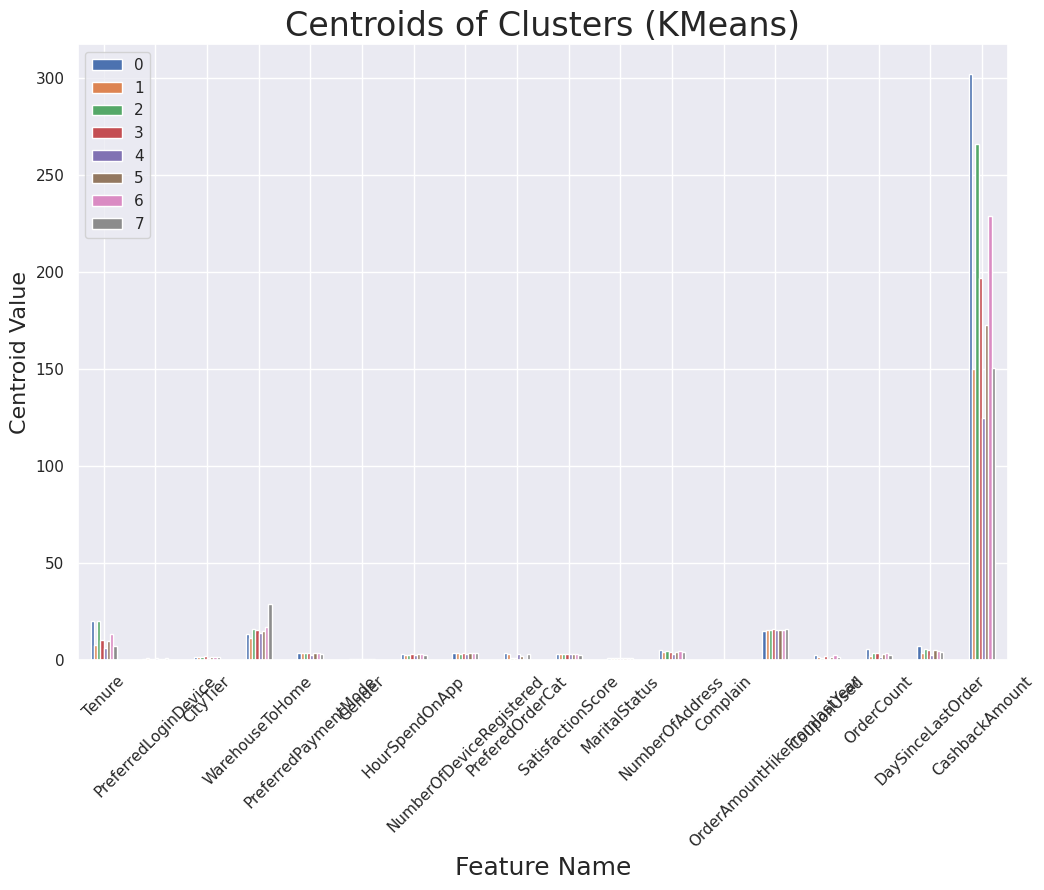

In [120]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=X_train.columns)
centroid_df = centroid_df.T

plt.figure(figsize=(20, 20))
centroid_df.plot(kind='bar', figsize=(12,8))
plt.title('Centroids of Clusters (KMeans)', fontsize=24)
plt.xlabel('Feature Name', fontsize=18)
plt.ylabel('Centroid Value', fontsize=16)
plt.xticks(rotation=45)
plt.show()



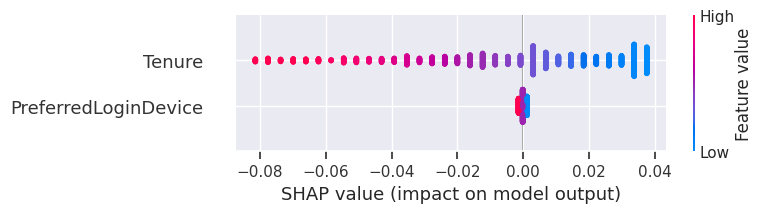

In [121]:
import shap
from sklearn.linear_model import LinearRegression

X_train_subset = X_train[['PreferredLoginDevice', 'Tenure']]
X_test_subset = X_test[['PreferredLoginDevice', 'Tenure']]

kmeans.fit(X_train_subset)

cluster_labels = kmeans.predict(X_train_subset)

surrogate_model = LinearRegression()
surrogate_model.fit(X_train_subset, cluster_labels)

explainer = shap.Explainer(surrogate_model, X_train_subset)
shap_values = explainer.shap_values(X_test_subset)

shap.summary_plot(shap_values, X_test_subset, feature_names=X_test_subset.columns)


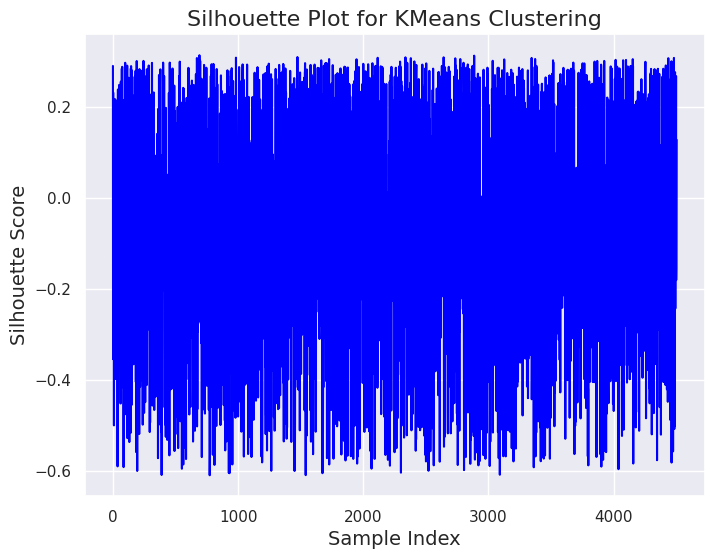

In [122]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X_train, kmeans.labels_)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(silhouette_vals, color='blue')
plt.title('Silhouette Plot for KMeans Clustering', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.show()


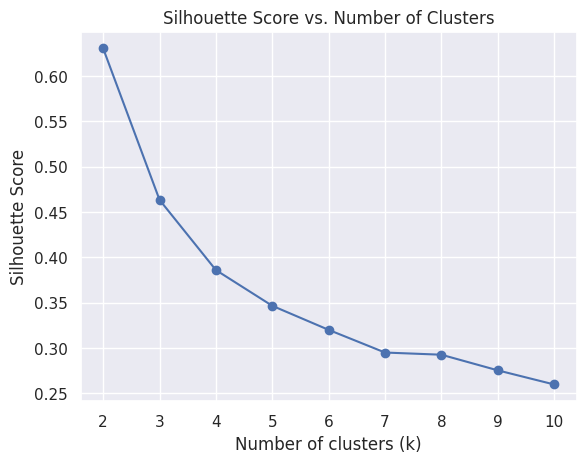

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 11):  # We start from 2 clusters as silhouette score requires at least two clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


 Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'C': 1, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(random_state=0, class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [126]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score:", round(accuracy * 100, 2), "%")

Accuracy Score: 79.22 %


In [127]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

print('F-1 Score:', f1_score(y_test, y_pred, average='micro'))
print('Precision Score:', precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', recall_score(y_test, y_pred, average='micro'))
print('Jaccard Score:', jaccard_score(y_test, y_pred, average='micro'))
print('Log Loss:', log_loss(y_test, y_pred))


F-1 Score: 0.7921847246891652
Precision Score: 0.7921847246891652
Recall Score: 0.7921847246891652
Jaccard Score: 0.6558823529411765
Log Loss: 7.490421752267685


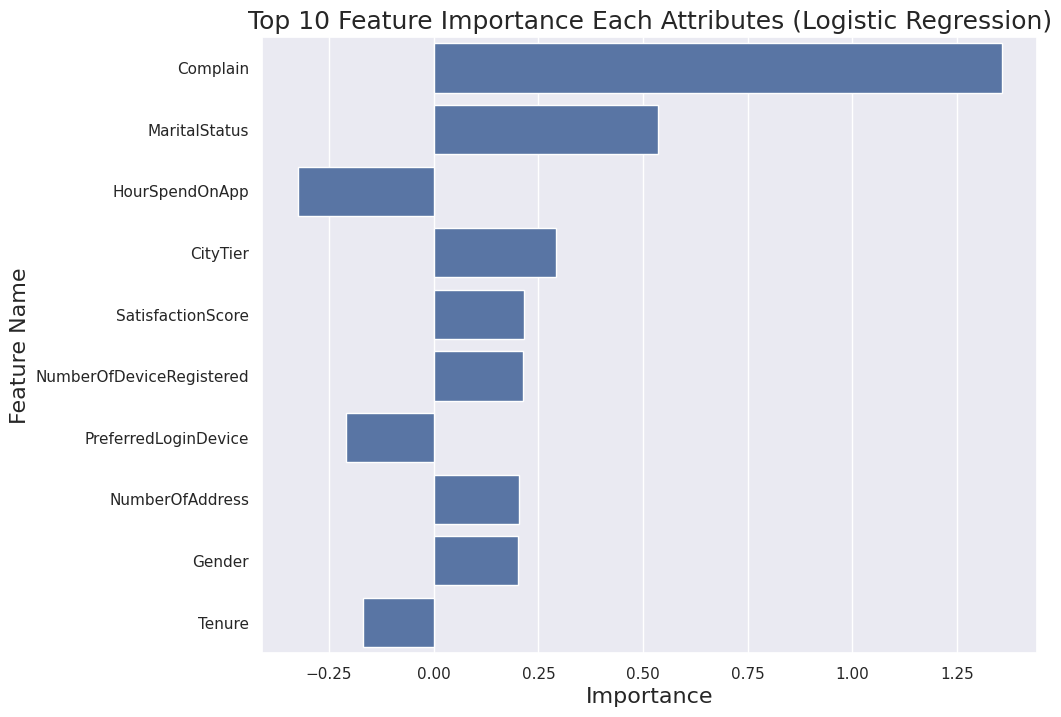

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importance = logreg.coef_[0]
feature_names = X_train.columns
imp_df = pd.DataFrame({"Feature Name": feature_names, "Importance": importance})
imp_df = imp_df.reindex(imp_df.Importance.abs().sort_values(ascending=False).index)

fi_top = imp_df.head(10)

# Plot the top feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=fi_top, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Logistic Regression)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()


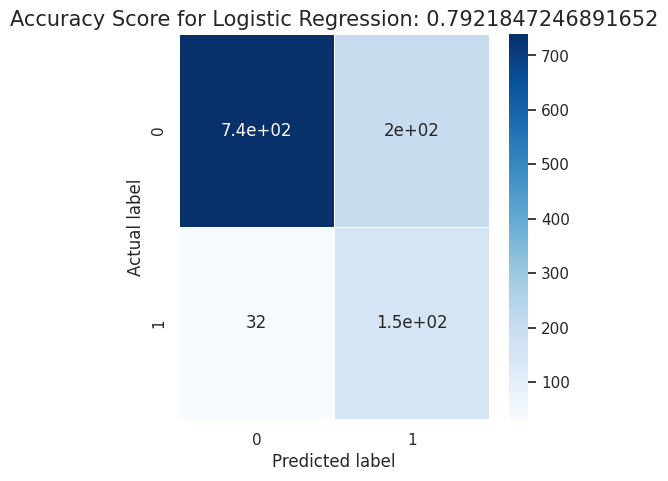

In [129]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(logreg.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()


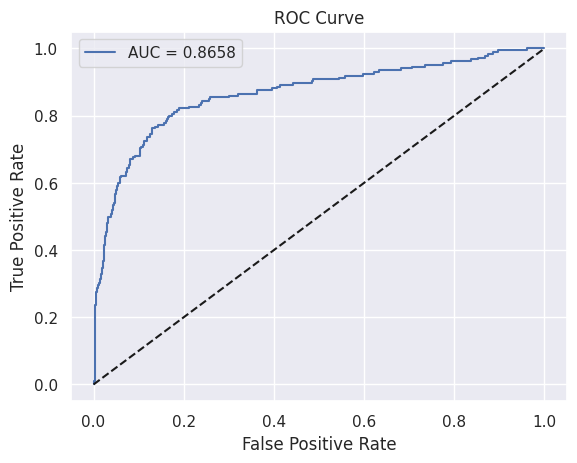

In [130]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [133]:
from sklearn.metrics import accuracy_score

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy Score for KNN:", round(accuracy_knn * 100, 2), "%")


Accuracy Score for KNN: 86.68 %


In [134]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

y_pred_knn = knn.predict(X_test)

print('F-1 Score : ', f1_score(y_test, y_pred_knn, average='micro'))
print('Precision Score : ', precision_score(y_test, y_pred_knn, average='micro'))
print('Recall Score : ', recall_score(y_test, y_pred_knn, average='micro'))
print('Jaccard Score : ', jaccard_score(y_test, y_pred_knn, average='micro'))

F-1 Score :  0.866785079928952
Precision Score :  0.866785079928952
Recall Score :  0.866785079928952
Jaccard Score :  0.7648902821316614


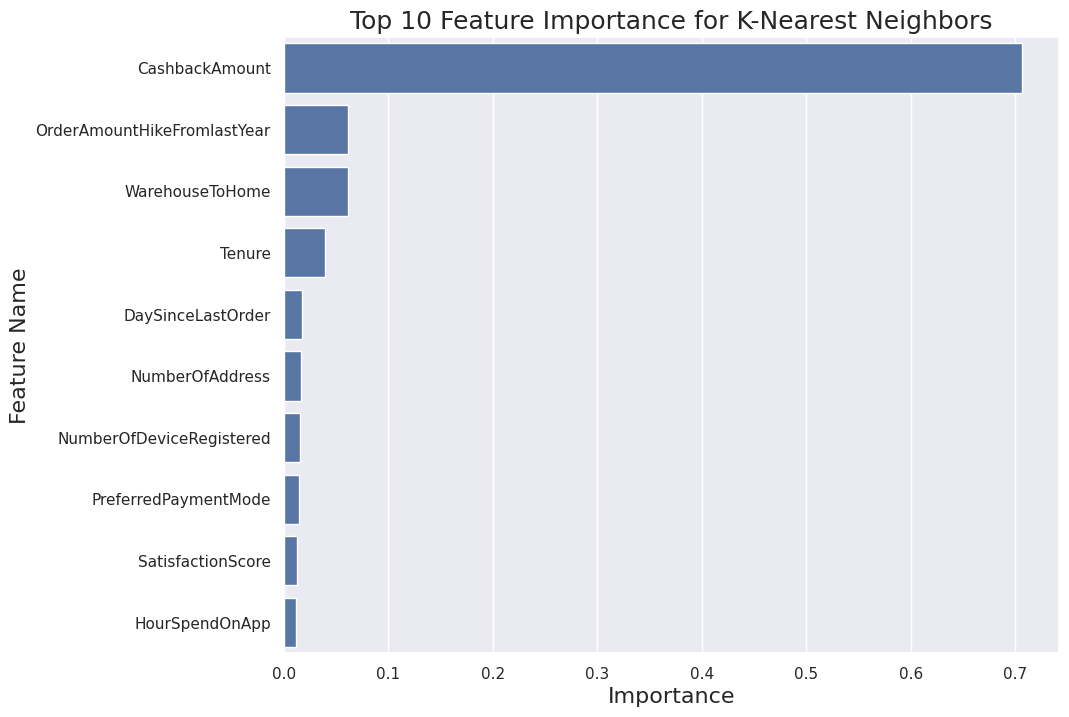

In [135]:

_, neighbor_indices = knn.kneighbors(X_test)
reshaped_indices = neighbor_indices.reshape(-1)
neighbor_features = X_train.iloc[reshaped_indices]
feature_freq = neighbor_features.sum()
feature_importance = feature_freq / feature_freq.sum()

imp_df_knn = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": feature_importance
})

fi_knn = imp_df_knn.sort_values(by="Importance", ascending=False)
fi2_knn = fi_knn.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=fi2_knn, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance for K-Nearest Neighbors', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()


In [136]:
y_pred = np.round(y_pred)

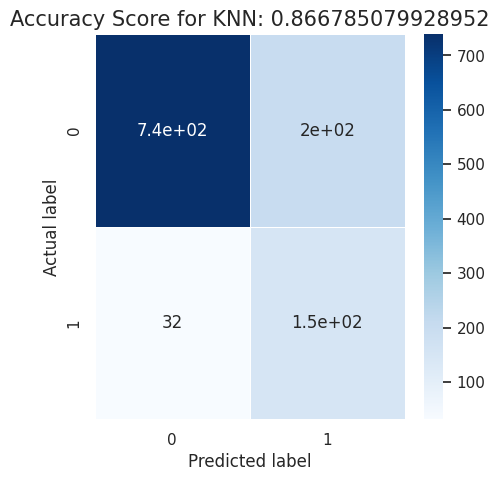

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for KNN: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()


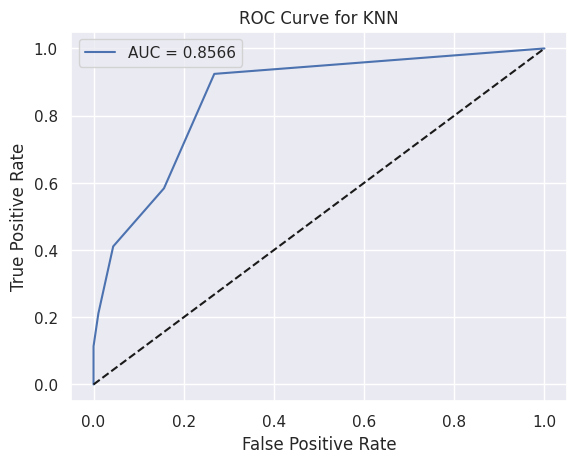

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

plt.plot(fpr_knn, tpr_knn, label='AUC = %0.4f' % auc_knn)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()
